In [1]:
from pyqgraf import qgraf, model
from feynml.interface.qgraf import style
from feynmodel.interface.ufo import load_ufo_model
from feynmodel.interface.qgraf import feynmodel_to_qgraf
from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.feynmandiagram import FeynML
from feynamp.amplitude import square, multiply, feynman_diagram_to_string
import feynamp.amplitude as famp
import feynamp.vertex as fvert
import feynamp

import feynamp.form.momentum as m
from feynamp.form.color import apply_color, get_color
from feynamp.form.lorentz import apply_gammas, get_gammas
from feynamp.form.momentum import get_kinematics, get_onshell,get_mandelstamm_2_to_2, apply
import logging
logger = logging.getLogger("feynamp")
logger.setLevel(logging.DEBUG)


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


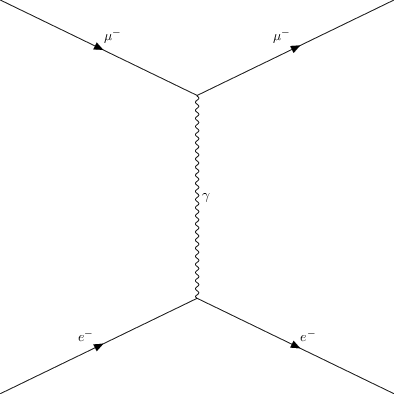

In [11]:
fm = load_ufo_model("ufo_sm")
fm.remove_object(fm.get_particle("G0"))
fm.remove_object(fm.get_particle("Z"))
fm.remove_object(fm.get_particle("H"))
qfm = feynmodel_to_qgraf(fm, True, False)
qgraf.install("3.6.5")
xml_string = qgraf.run("e_minus[p1], mu_minus[p2]", "e_minus[p3], mu_minus[p4]",loops=0,loop_momentum="l",model = qfm, style=style)

parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)
fds = fml.diagrams
for fd in fds:
    fd.render()

In [3]:
import sympy
g = sympy.Symbol("ee")
ret = feynamp.form.compute_squared(fds,fm)  / g**4
#sympy.simplify(ret.subs("t","-u-s"))
ret

DEBUG:feynamp:ret='((-(ee*complex(0,1)))*(1)*(Gamma(MuIn2,SpinOutProp1,SpinIn1))) * ((-(ee*complex(0,1)))*(1)*(Gamma(MuOut2,SpinOut1,SpinInProp1))) * (u(SpinIn1,Mom_p1)) * (eps(MuIn2,PolIn2,Mom_p2)) * (u_bar(SpinOut1,Mom_p3)) * (eps_star(MuOut2,PolOut2,Mom_p4)) * ((P(Mu12,Mom_p1+Mom_p2)*Gamma(Mu12,SpinInProp1,SpinOutProp1) + Mass_Me*GammaId(SpinInProp1,SpinOutProp1))*Denom(Mom_p1+Mom_p2,Mass_Me)) * '
DEBUG:feynamp:ret='((-(ee*complex(0,1)))*(1)*(Gamma(MuOut2,SpinOutProp1,SpinIn1))) * ((-(ee*complex(0,1)))*(1)*(Gamma(MuIn2,SpinOut1,SpinInProp1))) * (u(SpinIn1,Mom_p1)) * (eps(MuIn2,PolIn2,Mom_p2)) * (u_bar(SpinOut1,Mom_p3)) * (eps_star(MuOut2,PolOut2,Mom_p4)) * ((P(Mu17,Mom_p1-Mom_p4)*Gamma(Mu17,SpinInProp1,SpinOutProp1) + Mass_Me*GammaId(SpinInProp1,SpinOutProp1))*Denom(Mom_p1-Mom_p4,Mass_Me)) * '
DEBUG:feynamp:ret='((-(ee*complex(0,1)))*(1)*(Gamma(MuLeg21,SpinLeg20,SpinInPropagator24))) * ((-(ee*complex(0,1)))*(1)*(Gamma(MuLeg23,SpinOutPropagator24,SpinLeg22))) * (u_bar(SpinLeg20,Mom_p

((Mass_Me**2 - s)**2*(Mass_Me**6 + 8*Mass_Me**5 + Mass_Me**4*u + 10*Mass_Me**4 - 2*Mass_Me**3*s - 2*Mass_Me**3*t + 2*Mass_Me**3*u - 2*Mass_Me**2*s - 4*Mass_Me**2*t + 2*Mass_Me**2*u - 2*s*u) + 4*(Mass_Me**2 - s)*(Mass_Me**2 - u)*(-4*Mass_Me**6 + 8*Mass_Me**5 + Mass_Me**4*s + Mass_Me**4*t + Mass_Me**4*u + 2*Mass_Me**4 - 2*Mass_Me**3*t - 2*Mass_Me**2*s - 3*Mass_Me**2*t - 2*Mass_Me**2*u + s*t + t**2 + t*u) + (Mass_Me**2 - u)**2*(Mass_Me**6 + 8*Mass_Me**5 + Mass_Me**4*s + 10*Mass_Me**4 + 2*Mass_Me**3*s - 2*Mass_Me**3*t - 2*Mass_Me**3*u + 2*Mass_Me**2*s - 4*Mass_Me**2*t - 2*Mass_Me**2*u - 2*s*u))/((Mass_Me**2 - s)**2*(Mass_Me**2 - u)**2)

In [4]:
sympy.simplify(ret.subs({"Mass_Me":0, "t": "-u-s"}))

-2*s/u - 2*u/s

In [5]:
import equation_database.isbn_9780511628788 as ref
ref.table_7_1_qqb_gg.subs("u","-t-s")

(32*t**2/27 + 32*(-s - t)**2/27)/(t*(-s - t)) - (8*t**2/3 + 8*(-s - t)**2/3)/s**2

In [6]:

ret.equals(ref.table_7_1_qqb_gg * sympy.Symbol("G")**4 )

False

In [7]:
sympy.simplify(ref.table_7_1_qqb_gg.subs("u","-t-s")-ret.subs("u","-t-s"))

(27*s**2*t*(s + t)*((Mass_Me**2 - s)**2*(-Mass_Me**6 - 8*Mass_Me**5 + Mass_Me**4*(s + t) - 10*Mass_Me**4 + 2*Mass_Me**3*s + 2*Mass_Me**3*t + 2*Mass_Me**3*(s + t) + 2*Mass_Me**2*s + 4*Mass_Me**2*t + 2*Mass_Me**2*(s + t) - 2*s*(s + t)) - 4*(Mass_Me**2 - s)*(Mass_Me**2 + s + t)*(-4*Mass_Me**6 + 8*Mass_Me**5 + Mass_Me**4*s + Mass_Me**4*t - Mass_Me**4*(s + t) + 2*Mass_Me**4 - 2*Mass_Me**3*t - 2*Mass_Me**2*s - 3*Mass_Me**2*t + 2*Mass_Me**2*(s + t) + s*t + t**2 - t*(s + t)) + (Mass_Me**2 + s + t)**2*(-Mass_Me**6 - 8*Mass_Me**5 - Mass_Me**4*s - 10*Mass_Me**4 - 2*Mass_Me**3*s + 2*Mass_Me**3*t - 2*Mass_Me**3*(s + t) - 2*Mass_Me**2*s + 4*Mass_Me**2*t - 2*Mass_Me**2*(s + t) - 2*s*(s + t))) - 32*s**2*(Mass_Me**2 - s)**2*(t**2 + (s + t)**2)*(Mass_Me**2 + s + t)**2 - 72*t*(Mass_Me**2 - s)**2*(s + t)*(t**2 + (s + t)**2)*(Mass_Me**2 + s + t)**2)/(27*s**2*t*(Mass_Me**2 - s)**2*(s + t)*(Mass_Me**2 + s + t)**2)